## Objective:

**Repeat diabetes example but with a 5-fold CV.  
Do conclusions about the best model stay the same?**

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


from sklearn import linear_model
from sklearn import neighbors
from sklearn import svm
from sklearn import ensemble

In [3]:
diabetes_data = datasets.load_diabetes()

diabetes = pd.DataFrame(diabetes_data["data"], columns=diabetes_data["feature_names"])
diabetes["disease_progression"] = diabetes_data["target"]

diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,disease_progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [29]:
target_column = 'disease_progression'
features = [i for i in diabetes.columns if i != target_column]

X = diabetes[features]
y = diabetes[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=42)

In [34]:
models = {'OLS': linear_model.LinearRegression(), 
          'K Neighbours': neighbors.KNeighborsRegressor(), 
          'SVR': svm.SVR(),
          'Random Forest': ensemble.RandomForestRegressor()
         }

mse_dict = {}

for model in models.keys():
    cv = cross_val_score(estimator=models[model], 
                     X=X_train,
                     y=y_train,
                     cv=5,
                     scoring="neg_mean_squared_error")
    rsme = round((-cv.mean())**0.5,1)
    mse_dict[model] = rsme
    
    print(f'{model} RSME returns {rsme}')

OLS RSME returns 56.3
K Neighbours RSME returns 62.7
SVR RSME returns 79.3
Random Forest RSME returns 60.4


Text(0.5, 1.0, 'Root square MSE by regression model')

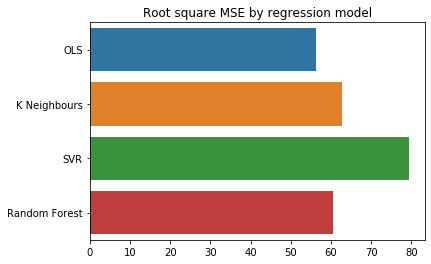

In [36]:
labels = [i for i in mse_dict.keys()]
values = [mse_dict[l] for l in labels]


sns.barplot(x=values, y=labels)
plt.title('Root square MSE by regression model')

In [37]:
# Final test on test data.

reg = linear_model.LinearRegression()

In [39]:
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [43]:
mse = metrics.mean_squared_error(y_test, reg.predict(X_test))
mse**0.5

53.12003915269995

In [44]:
a = 7.5
hr = 16
a * hr

120.0